<a href="https://colab.research.google.com/github/nguyenmanhcuong1291/python---upload-video-youtube/blob/master/Copy_of_Matplotlib_Seaborn_pratice_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib_Seaborn_pratice

Link dataset
https://drive.google.com/file/d/1K9JvReiV3QNrN_i3t-xCWhCz8nUO9sBR/view?usp=drive_link

# 1.Nhập dữ liệu và xử lý thông tin ban đầu

## 1.1 Nhập các thư viện cần thiết

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## 1.2 Kiểm tra dữ liệu ban đầu của dataset

In [ ]:
# Check các cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
# Check xem cột nào hiển thị dạng số
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


Nhận định 1: Một số cột quan trọng không hiển thị ở dạng số vô hướng (scalar type), ví dụ như cột Gross

In [ ]:
# Check số lượng giá trị rỗng
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Nhận định 2: Có 3 cột bị thiếu giá trị

## 1.3 Loại bỏ các cột không cần thiết cho việc phân tích, ví dụ như cột ""Poster_Link" và "Overview"

In [ ]:
df.drop (["Poster_Link", "Overview"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


## 1.4 Sử dụng dropna() để loại bỏ giá trị rỗng tại các cột

In [ ]:
# df.dropna(subset = ['Certificate', 'Meta_score', 'Gross'],inplace = True)
df.dropna(inplace = True)

In [ ]:
# Dùng isna() để check lại xem đã loại bỏ hết giá trị rỗng hay chưa
df.isna().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [ ]:
# Check lại bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   714 non-null    object 
 1   Released_Year  714 non-null    object 
 2   Certificate    714 non-null    object 
 3   Runtime        714 non-null    object 
 4   Genre          714 non-null    object 
 5   IMDB_Rating    714 non-null    float64
 6   Meta_score     714 non-null    float64
 7   Director       714 non-null    object 
 8   Star1          714 non-null    object 
 9   Star2          714 non-null    object 
 10  Star3          714 non-null    object 
 11  Star4          714 non-null    object 
 12  No_of_Votes    714 non-null    int64  
 13  Gross          714 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 83.7+ KB


## 1.5 Chuyển cột "Gross" về định dạng số học.
Gợi ý:
+ dùng replace() loại bỏ dấu phẩy (,)
+ dùng astype() chuyển về định dạng số học

In [ ]:
try:
  df['Gross'] = df['Gross'].str.replace(',', '')
  df['Gross'] = df['Gross'].astype('float64')
except:
  df['Gross'] = df['Gross'].astype('float64')

In [ ]:
# In ra dtype của cột Gross để kiểm tra
df['Gross'].dtype

dtype('float64')

# 2.Các yêu cầu

## 2.1 Sử dụng biểu đồ countplot() để phân tích tính phổ biến của Certificate và đưa ra nhận định của bạn.

| Tên Loại Certificate | Nội Dung Tương Ứng |
|----------------------|---------------------|
| A                    | Chỉ dành cho người trưởng thành, có thể chứa nội dung không phù hợp cho trẻ em. |
| UA                   | Tương tự như 'A', nhưng có sự hướng dẫn cho phụ huynh đối với trẻ em dưới 12 tuổi. |
| U                    | Phù hợp cho mọi đối tượng. Không có nội dung đặc biệt đối với trẻ em. |
| R                    | Chỉ phù hợp cho người trên 17 tuổi hoặc phải có sự hướng dẫn của phụ huynh hoặc người giám hộ. |
| G                    | Phù hợp cho mọi lứa tuổi. Không có nội dung hoặc hình ảnh đặc biệt có thể gây ám ảnh cho trẻ em. |
| PG-13                | Có thể chứa nội dung không phù hợp cho trẻ em dưới 13 tuổi. |
| PG                   | Có thể có một số nội dung không phù hợp cho trẻ em dưới 10 tuổi. |
| Passed              | Được sử dụng cho các phim đã được kiểm tra và được chứng nhận là phù hợp cho mọi đối tượng. |
| Approved            | Được sử dụng trong quá khứ để chỉ đánh giá phù hợp của một bộ phim. |
| TV-PG               | Phù hợp cho phụ huynh hướng dẫn. |
| U/A                 | Phù hợp cho mọi đối tượng, nhưng với sự hướng dẫn của người lớn. |
| GP                 | Tương tự như 'PG', phù hợp cho mọi đối tượng nhưng cần sự hướng dẫn từ phụ huynh. |


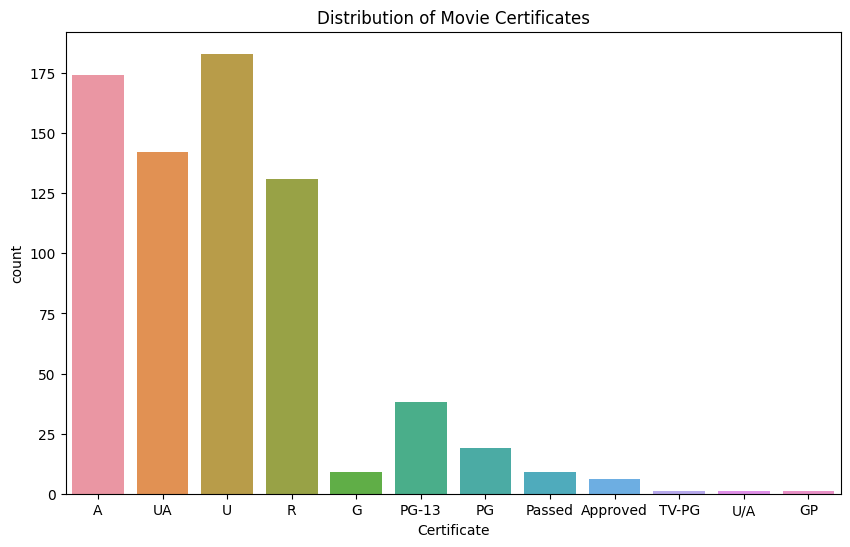

In [ ]:
# 1. Phân tích phổ biến của Certificate
plt.figure(figsize=(10, 6))
sns.countplot(x='Certificate', data=df)
plt.title('Distribution of Movie Certificates')
plt.show()

## 2.2 Sử dụng biểu đồ lineplot() để so sánh IMDb Ratings giữa các năm phát hành và đưa ra nhận định của bạn.

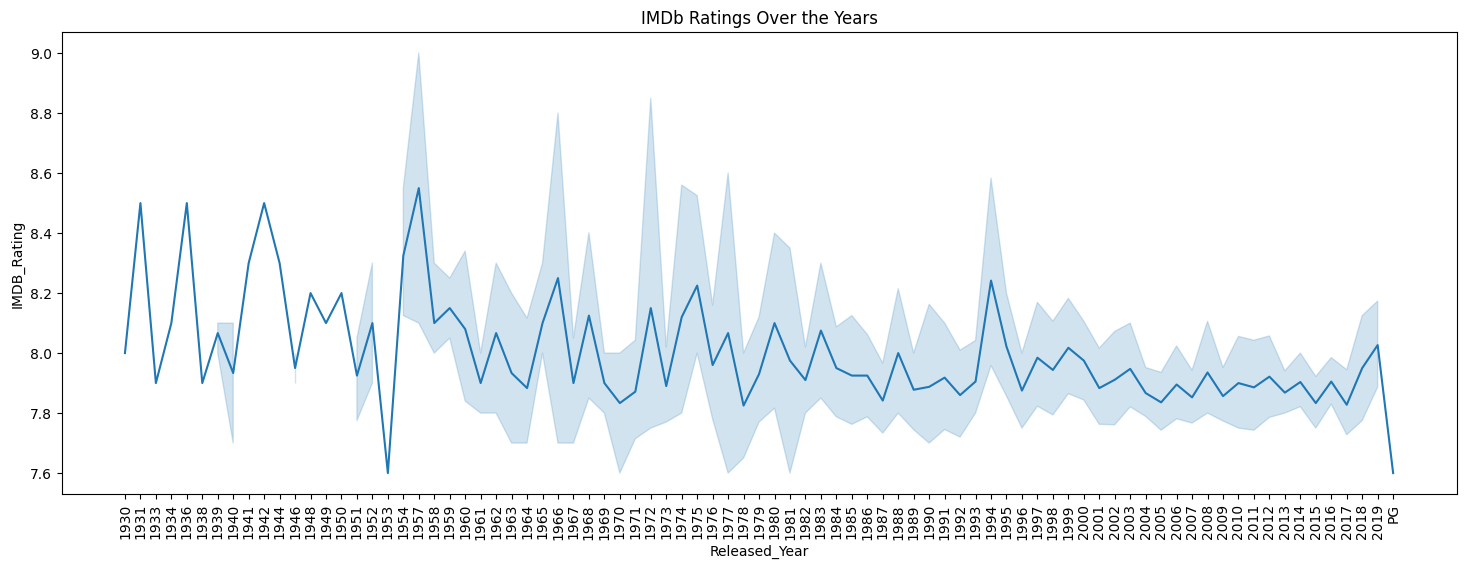

In [ ]:
# 2. So sánh IMDb Ratings giữa các năm phát hành
plt.figure(figsize=(18, 6))
# Sắp xếp DataFrame theo cột 'Released_Year'
df_sorted = df.sort_values(by='Released_Year')
# Vẽ biểu đồ
sns.lineplot(x='Released_Year', y='IMDB_Rating', data=df_sorted)
plt.title('IMDb Ratings Over the Years')
plt.xticks(rotation=90)  # Xoay ngang nhãn trục x
plt.show()



## 2.3 Sử dụng biểu đồ histplot() để phân tích thời lượng phim và đưa ra nhận định của bạn.

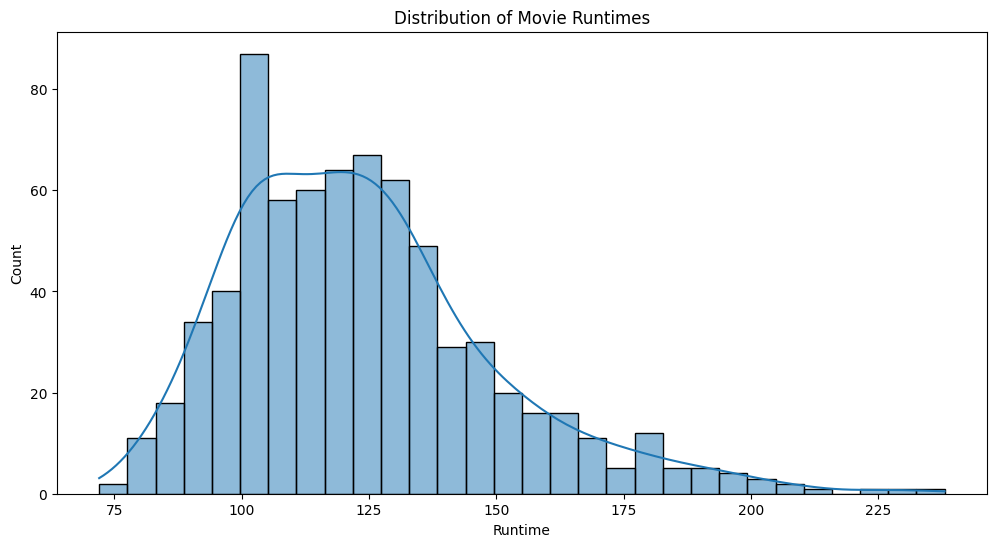

In [ ]:
# 3. Phân tích thời lượng phim
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)
plt.figure(figsize=(12, 6))
sns.histplot(x='Runtime', data=df, bins=30, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.show()

## 2.4 Sử dụng biểu đồ scatterplot() để So sánh Ratings IMDb và Meta Score và đưa ra nhận định của bạn.

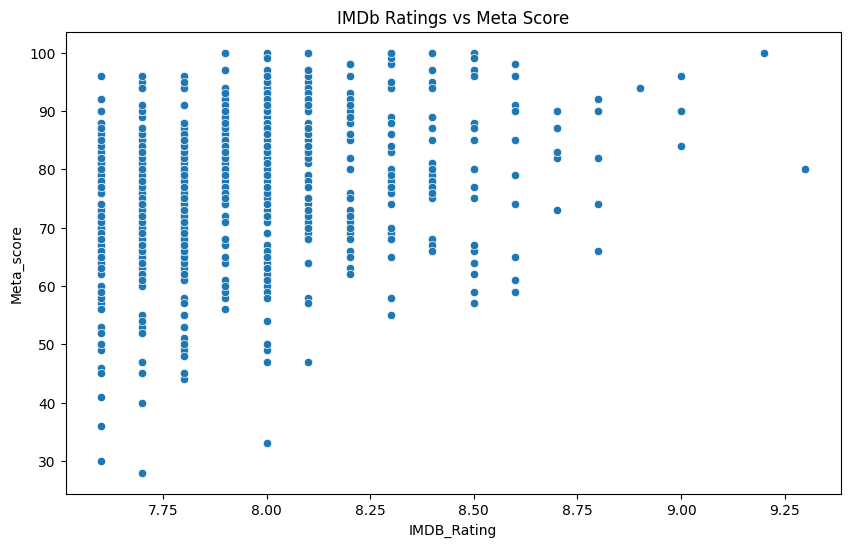

In [ ]:
# 4. So sánh Ratings IMDb và Meta Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Meta_score', data=df)
plt.title('IMDb Ratings vs Meta Score')
plt.show()

## 2.5 Sử dụng biểu đồ countplot() để Phân loại thể loại phim và đưa ra nhận định của bạn.

**Lưu ý:** \
Phân tích theo Tags chứ không phải theo Genre. \
Một Genre có thể chứa nhiều tag. \
Ví dụ: Tag là Drama, Genre là "Drama, Adventure, Comedy"

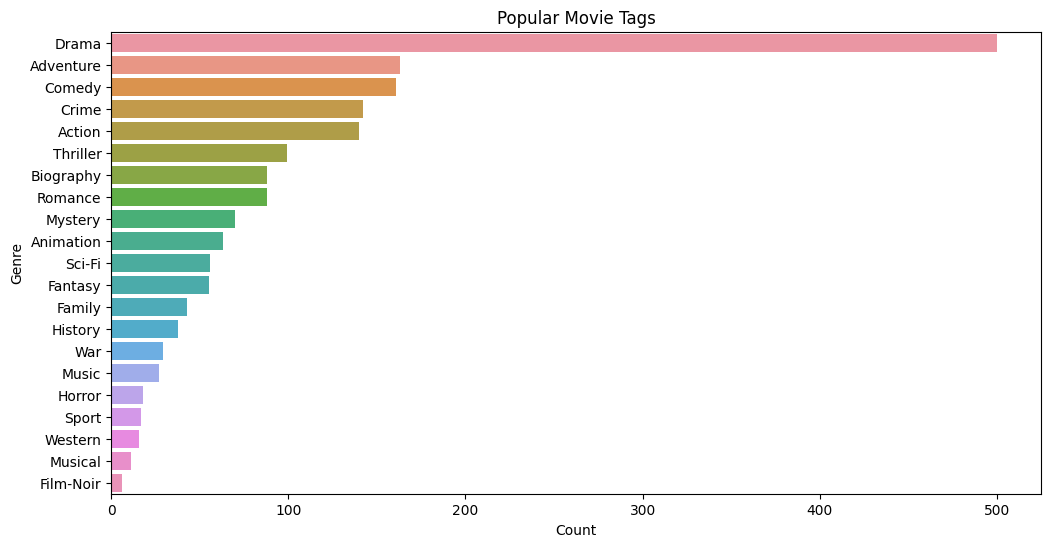

In [ ]:
# 5 Phân tích thể loại phim theo tags
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ DataFrame
# df = pd.read_csv('ten_file.csv')

# Tách các tag từ cột 'Genre'
tags = df['Genre'].str.split(', ').explode()

# Vẽ biểu đồ countplot
plt.figure(figsize=(12, 6))
sns.countplot(y=tags, order=tags.value_counts().index)
plt.title('Popular Movie Tags')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [ ]:
tags.unique()

array(['Drama', 'Crime', 'Action', 'Adventure', 'Biography', 'History',
       'Sci-Fi', 'Romance', 'Western', 'Fantasy', 'Comedy', 'Thriller',
       'Animation', 'Family', 'War', 'Mystery', 'Music', 'Horror',
       'Sport', 'Musical', 'Film-Noir'], dtype=object)

| Thể Loại     | Mô Tả Ngắn Gọn                                          |
|--------------|-----------------------------------------------------------|
| Drama        | Phim với nền tảng chính là các mâu thuẫn và tình cảm.    |
| Crime        | Phim về tội phạm, hành động pháp lý và cuộc điều tra.     |
| Action       | Phim với những cảnh hành động và đối đầu sôi động.       |
| Adventure    | Phim với hành trình, khám phá và những thách thức phiêu lưu. |
| Biography    | Phim về cuộc sống và sự nghiệp của một người nổi tiếng.  |
| History      | Phim lấy cảm hứng từ sự kiện lịch sử và thời kỳ quá khứ. |
| Sci-Fi       | Phim khoa học viễn tưởng với yếu tố khoa học và công nghệ. |
| Romance      | Phim tập trung vào mối quan hệ tình cảm và lãng mạn.     |
| Western      | Phim có bối cảnh hoặc yếu tố của vùng miền phương Tây.    |
| Fantasy      | Phim với yếu tố huyền bí, thần thoại và thế giới tưởng tượng. |
| Comedy       | Phim hài hước, mục đích chính là làm cho khán giả cười.   |
| Thriller     | Phim kịch tính, gay cấn và thường có yếu tố hành động.   |
| Animation    | Phim hoạt hình, thường sử dụng kỹ thuật vẽ hoặc đồ họa.  |
| Family       | Phim gia đình, phù hợp cho cả gia đình xem chung.       |
| War          | Phim về chiến tranh và hậu quả của các xung đột vũ trụ.  |
| Mystery      | Phim huyền bí, trinh thám với những bí mật và điều tra.  |
| Music        | Phim với nền tảng là âm nhạc và ngành công nghiệp âm nhạc. |
| Horror       | Phim kinh dị, nhằm tạo ra cảm giác sợ hãi và kinh hoàng. |
| Sport        | Phim thể thao, liên quan đến các môn thể thao và đối đầu. |
| Musical      | Phim có yếu tố nhảy múa, hát và biểu diễn âm nhạc.      |
| Film-Noir    | Phim đen trắng với không khí bí ẩn và tội ác.            |


## 2.6 Sử dụng biểu đồ barplot() để phân tích về đạo diễn và diễn viên theo số lượng phim và đưa ra nhận định của bạn.

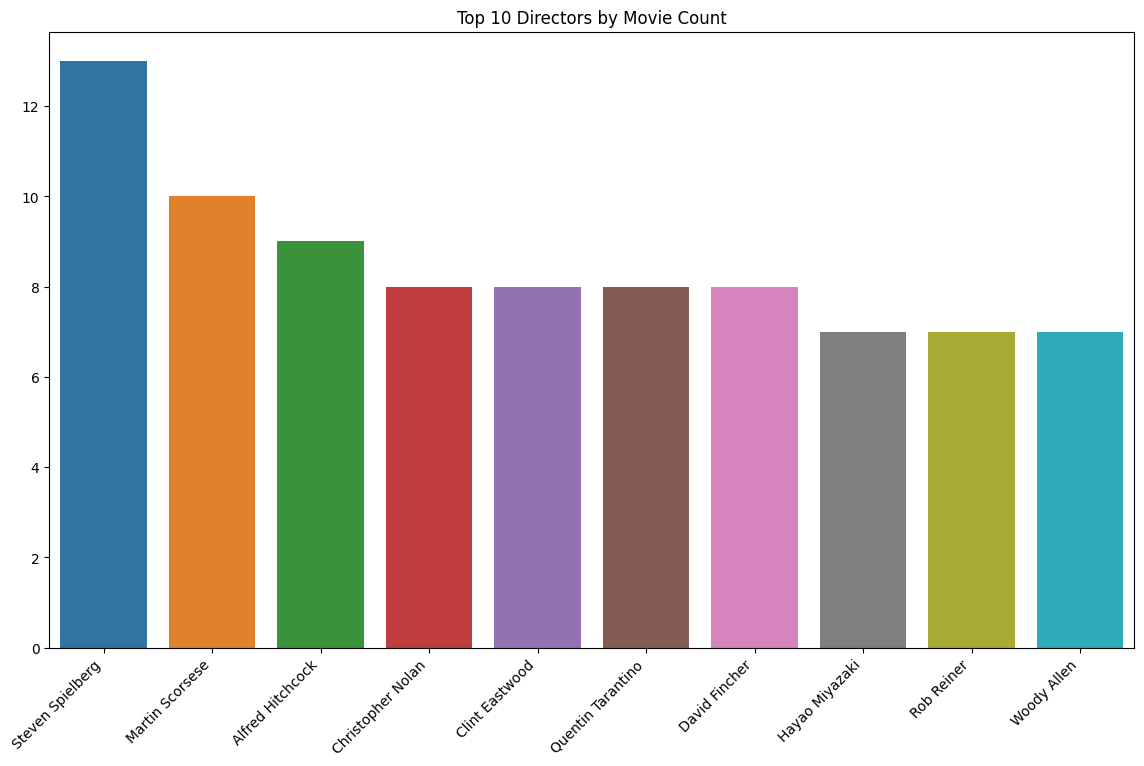

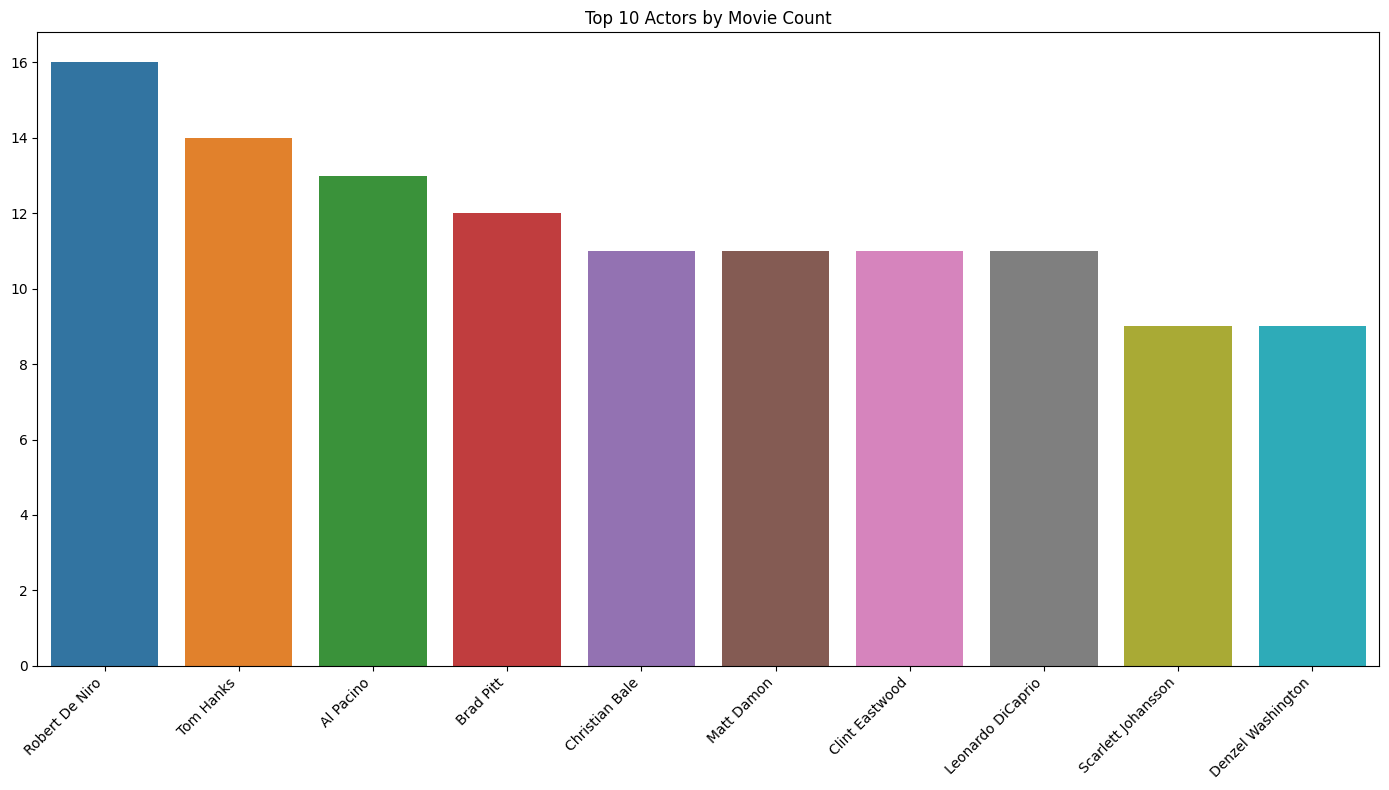

In [ ]:
# 6. Phân tích đạo diễn và diễn viên
top_directors = df['Director'].value_counts().head(10)
top_actors = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']]).value_counts().head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title('Top 10 Directors by Movie Count')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=top_actors.index, y=top_actors.values)
plt.title('Top 10 Actors by Movie Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 2.7 Sử dụng biểu đồ lineplot() để trực quan hóa doanh thu theo năm và đưa ra nhận định của bạn.

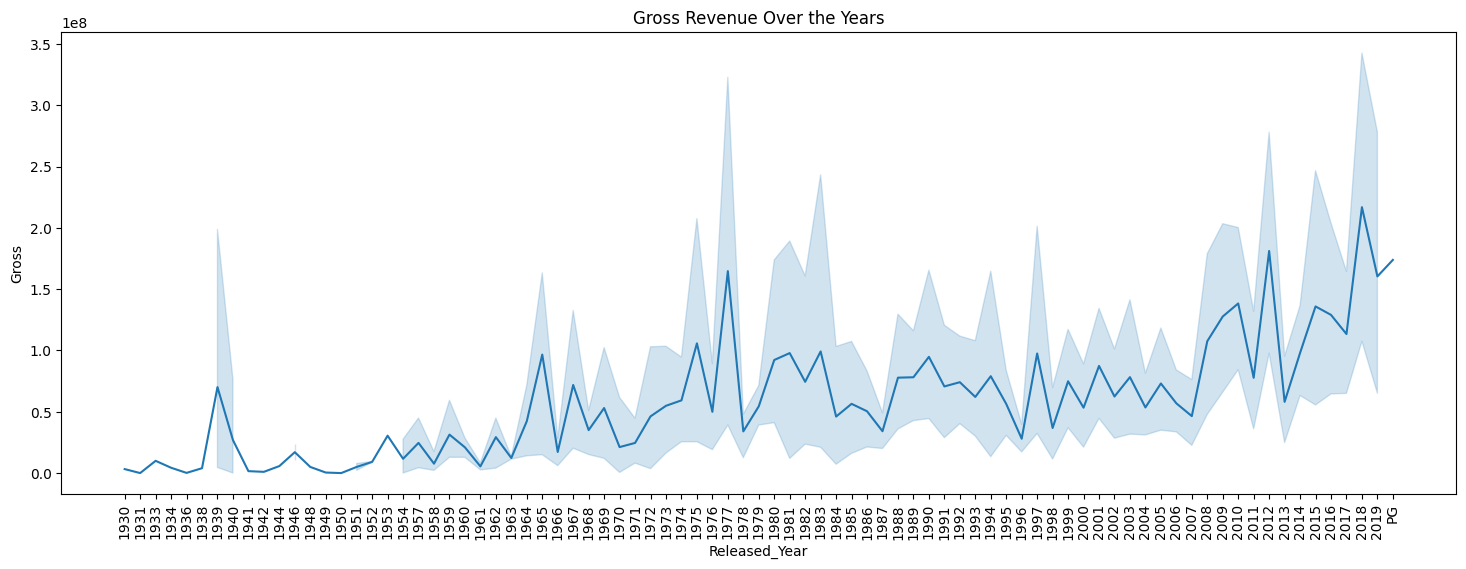

In [ ]:
# 7. Trực quan hóa doanh thu theo năm
plt.figure(figsize=(18, 6))
# Sắp xếp DataFrame theo cột 'Released_Year'
df_sorted_by_year = df.sort_values(by='Released_Year')
# Vẽ biểu đồ
sns.lineplot(x='Released_Year', y='Gross', data=df_sorted_by_year)
plt.title('Gross Revenue Over the Years')
plt.xticks(rotation=90, ha='center')
plt.show()


## 2.8 Sử dụng biểu đồ boxplot() để Phân tích đối tượng khán giả và Ratings IMDb và đưa ra nhận định của bạn

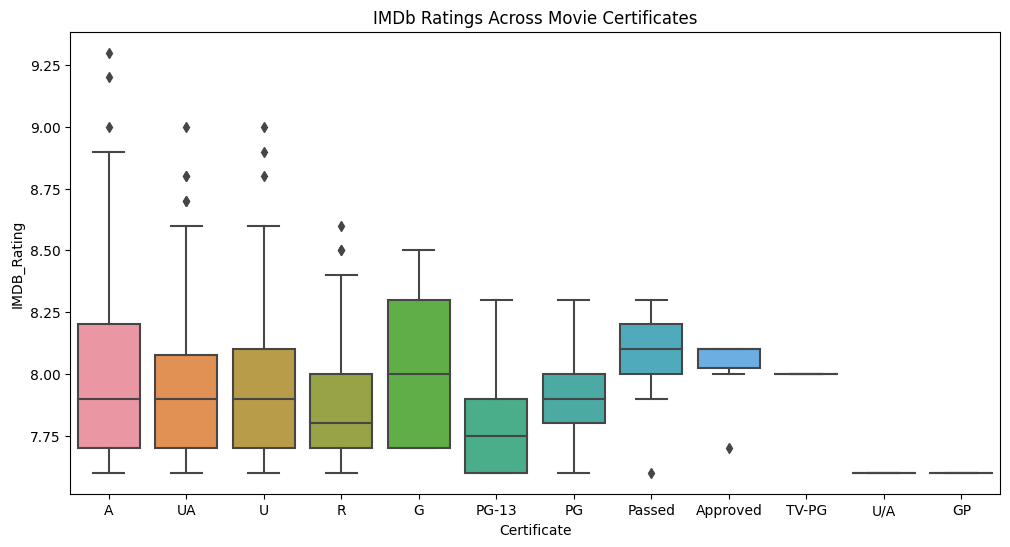

In [ ]:
# 8. Phân tích đối tượng khán giả và Ratings IMDb
plt.figure(figsize=(12, 6))
sns.boxplot(x='Certificate', y='IMDB_Rating', data=df)
plt.title('IMDb Ratings Across Movie Certificates')
plt.show()